In [127]:
#importing necessary packages
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn import cluster
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

In [128]:
start = time.time()
df = pd.read_csv('docword.enron.txt',skiprows=3,sep=' ',header=None)
df

,0,1,2
0,1,118,1
1,1,285,1
2,1,1229,1
3,1,1688,1
4,1,2068,1
...,...,...,...
3710415,39861,18448,1
3710416,39861,18848,1
3710417,39861,23449,1
3710418,39861,25721,1


In [129]:
#Creating list of unique Document IDs
docID = df[0].unique()
docID = list(docID)
docID = list(map(int,docID))
len(docID)

39861

In [130]:
#Creating list of unique Word IDs
WordID = df[1].unique()
WordID = list(WordID)
WordID = list(map(int,WordID))
len(WordID)

28099

In [131]:
#stratified sampling
dfnew = df.groupby([2], group_keys = False).apply(lambda x: x.sample(frac = 0.01, random_state = 42))

In [132]:
dfnew

,0,1,2
3606287,38113,4760,1
2629937,30815,20744,1
3029395,33275,15748,1
35449,615,9881,1
2548894,30302,11601,1
...,...,...,...
3167630,33954,7982,52
2874154,32257,4865,53
33361,590,3321,54
2211935,28247,14164,55


In [133]:
#Creating list of unique Document IDs after sampling
newdocID = dfnew[0].unique()
newdocID = list(newdocID)
newdocID = list(map(int,newdocID))
len(newdocID)

16508

In [134]:
#Creating list of unique Word IDs after sampling
newWordID = dfnew[1].unique()
newWordID = list(newWordID)
newWordID = list(map(int,newWordID))
len(newWordID)

9818

In [135]:
#creating sparse matrix
enron = dfnew.pivot(index=0,columns=1,values=2)

In [136]:
enron

1,4,8,10,17,19,20,25,27,30,34,...,28051,28054,28056,28060,28063,28084,28089,28090,28091,28096
0,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
enron = enron.fillna(0)
enron

1,4,8,10,17,19,20,25,27,30,34,...,28051,28054,28056,28060,28063,28084,28089,28090,28091,28096
0,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
#Calculating Jaccard indexes
Sym = enron.to_numpy()
J = 1-pairwise_distances(Sym,metric="jaccard")
J = pd.DataFrame(J)
J

C:\Users\AVIK DAS\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


,0,1,2,3,4,5,6,7,8,9,...,16498,16499,16500,16501,16502,16503,16504,16505,16506,16507
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


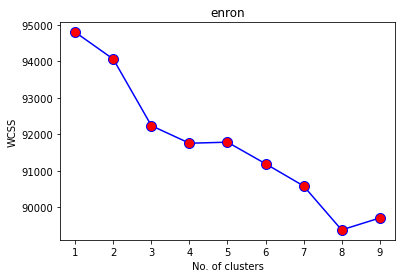

In [139]:
#Fitting the model for different number of clusters
l = []
for i in range(1,10):
    model = KMeans(n_clusters=i,init="k-means++",max_iter=100,n_init=10)
    model.fit(J)
    l.append(model.inertia_)
plt.title("enron")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.plot(list(range(1,10)),l,c="b",marker="o",markerfacecolor="red",markersize=10)

In [147]:
k_means = cluster.KMeans(n_clusters=3,random_state=42)
k_means.fit(J)
y_pred = k_means.predict(J)

In [148]:
k_means.cluster_centers_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.45276899e-04,  8.73011809e-04,  1.26692613e-04, ...,
         1.21624909e-04,  2.67431582e-04,  4.75943014e-04],
       [ 1.08420217e-19, -1.08420217e-19,  2.71050543e-20, ...,
         0.00000000e+00, -5.42101086e-20, -5.42101086e-20]])

In [149]:
#dimension reduction for visualization
PM = PCA(n_components = 2)
Mnew = PM.fit_transform(J)
x,y = Mnew[:,0],Mnew[:,1]
cluster_col = {0:"orange",1:"green",2:"red"}
clusters_names = {0:"cluster1",1:"cluster2",2:"cluster3"}
clusters = k_means.labels_.tolist()

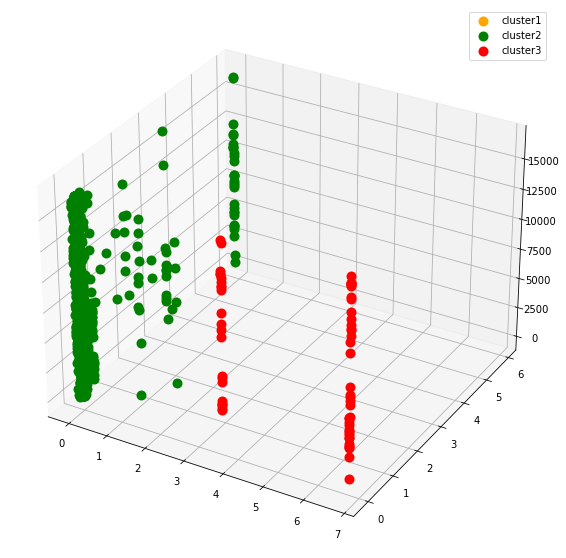

In [150]:
#3d plot for visualizing the different clusters
D = pd.DataFrame(dict(x = x, y = y, z = J.columns, label = clusters))
G = D.groupby("label")

plt.figure('KOS', figsize = (20,10))
axis = plt.axes(projection = '3d')
axis.margins(0.05)

for name, group in G:
    axis.plot(group.x, group.y, group.z, marker = "o", linestyle = "", ms = 10, 
              label = clusters_names[name], color= cluster_col[name], mec = 'none')
    axis.set_aspect('auto')
    axis.tick_params(\
                     axis = 'x',
                     which = 'both',
                     bottom = 'off',
                     top = 'off',
                     labelbottom = 'off')
    axis.tick_params(\
                     axis = 'y',
                     which = 'both',
                     bottom = 'off',
                     top = 'off',
                     labelbottom = 'off')

axis.legend(numpoints = 1)

In [151]:
#Giving output in the form of document IDs belonging to different clusters
output = {}
for i in np.unique(y_pred):
    output[i] = []
    for j in range(len(y_pred)):
        if y_pred[j] == i:
             output[i].append(j+1)
print(output)
for i in np.unique(y_pred):
    print(i,":",len(output[i]))

{0: [1879, 7990], 1: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 

In [145]:
#memory used
%load_ext memory_profiler 
from memory_profiler import profile
%memit k_means.fit(J)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 5115.92 MiB, increment: 4722.50 MiB


In [146]:
end = time.time()
print("Time taken:",end-start)

Time taken: 3962.097811460495
